In [ ]:
import keras
import json
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

data = pd.read_csv("synthetic_data.csv")

#crisis_column = data["Crisis"]
y = data["Crisis"]
data = data.drop(columns=["Crisis"])

data.head()

: 

**Preprocessing and Encoding**



In [5]:

l1=["Country", "Year", "Quarter", "Economic Development Status", "Banking Sector Stability", "Type of Governance"]
for column in data.columns:
  if column in l1:
        data_dummies=pd.get_dummies(data[column])
        data=pd.concat([data, data_dummies], axis=1)
        data=data.drop(column, axis=1)
print(data.head())
X = data

# print(X.shape)


   GDP Growth Rate  Yield Curve  Government Debt to GDP  Unemployment Rate  \
0         0.034379     1.138250               41.361976          15.306573   
1         0.016889     1.225368               24.830967          11.009620   
2         0.023106     1.978843               67.279714           6.752590   
3         0.034625     1.808444               56.599461          12.782277   
4         0.021456     0.311186               45.679465           9.358452   

   Inflation Rate  Foreign Exchange Reserves  Consumer Confidence  \
0        3.157973                  91.072212           145.990618   
1        6.804508                 164.190501           123.832985   
2        7.390434                 374.261253            58.940298   
3        4.091373                 466.291462            97.969431   
4        4.036805                 244.176571            77.605673   

   Current Account Balance  Country1  Country10  ...  Developing  Stagnant  \
0                44.319161      True  

**Scaling**

In [6]:
scaler = StandardScaler()
X.columns=X.columns.astype(str)
X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X

,GDP Growth Rate,Yield Curve,Government Debt to GDP,Unemployment Rate,Inflation Rate,Foreign Exchange Reserves,Consumer Confidence,Current Account Balance,Country1,Country10,...,Developing,Stagnant,Underdeveloped,Stable,Unstable,Autocracy,Democracy,Dictatorship,Monarchy,Other
0,0.681360,-0.487995,-0.796427,0.770754,-0.275815,-1.154150,1.577300,1.522882,9.949874,-0.100504,...,-0.608164,-0.468521,1.564697,0.511304,-0.511304,-0.45257,-0.5,-0.592749,1.829707,-0.403473
1,-0.066607,-0.384628,-1.520696,-0.110526,0.773194,-0.637611,0.816251,-1.564434,9.949874,-0.100504,...,-0.608164,-0.468521,1.564697,-1.955784,1.955784,-0.45257,-0.5,-0.592749,1.829707,-0.403473
2,0.199262,0.509379,0.339101,-0.983617,0.941749,0.846416,-1.412620,1.359786,9.949874,-0.100504,...,-0.608164,-0.468521,1.564697,0.511304,-0.511304,-0.45257,-0.5,-0.592749,1.829707,-0.403473
3,0.691895,0.307198,-0.128831,0.253036,-0.007301,1.496556,-0.072085,0.618437,9.949874,-0.100504,...,-0.608164,-0.468521,1.564697,0.511304,-0.511304,-0.45257,-0.5,-0.592749,1.829707,-0.403473
4,0.128703,-1.469315,-0.607266,-0.449171,-0.022999,-0.072556,-0.771520,0.585830,9.949874,-0.100504,...,-0.608164,-0.468521,1.564697,0.511304,-0.511304,-0.45257,-0.5,-0.592749,1.829707,-0.403473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.165345,-1.224978,0.737057,1.470186,-0.852022,1.039440,0.697610,0.579077,-0.100504,-0.100504,...,-0.608164,-0.468521,-0.639101,0.511304,-0.511304,-0.45257,-0.5,1.687055,-0.546536,-0.403473
3996,-0.527564,-0.292176,-0.079053,0.219824,1.163690,-0.607718,-0.020408,-0.099584,-0.100504,-0.100504,...,-0.608164,-0.468521,-0.639101,0.511304,-0.511304,-0.45257,-0.5,1.687055,-0.546536,-0.403473
3997,-0.005628,-0.797154,0.041880,1.043728,0.831699,-0.430765,-0.935160,0.182644,-0.100504,-0.100504,...,-0.608164,-0.468521,-0.639101,0.511304,-0.511304,-0.45257,-0.5,1.687055,-0.546536,-0.403473
3998,-0.200980,-1.269724,0.820443,-1.487967,0.471205,-1.548189,0.177010,1.279133,-0.100504,-0.100504,...,-0.608164,-0.468521,-0.639101,-1.955784,1.955784,-0.45257,-0.5,1.687055,-0.546536,-0.403473


**Splitting**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=42
)

print(X_train.shape)



(3800, 133)


**LSTM model**

In [9]:
model = Sequential()

model.add(
    LSTM(
        64, input_shape=(X_train.shape[1], 1), activation="relu", return_sequences=False
    )
)

model.add(Dense(1, activation="sigmoid"))

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

model.summary()

# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

history = model.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)

accuracy = model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3040/3040 [==============================] - 109s 36ms/step - loss: nan - accuracy: 0.7664 - val_loss: nan - val_accuracy: 0.7605
Epoch 2/10
3040/3040 [==============================] - 127s 42ms/step - loss: nan - accuracy: 0.7671 - val_loss: nan - val_accuracy: 0.7605
Epoch 3/10
3040/3040 [==============================] - 134s 44ms/step - loss: nan - accuracy: 0.7671 - val_loss: nan - val_accuracy

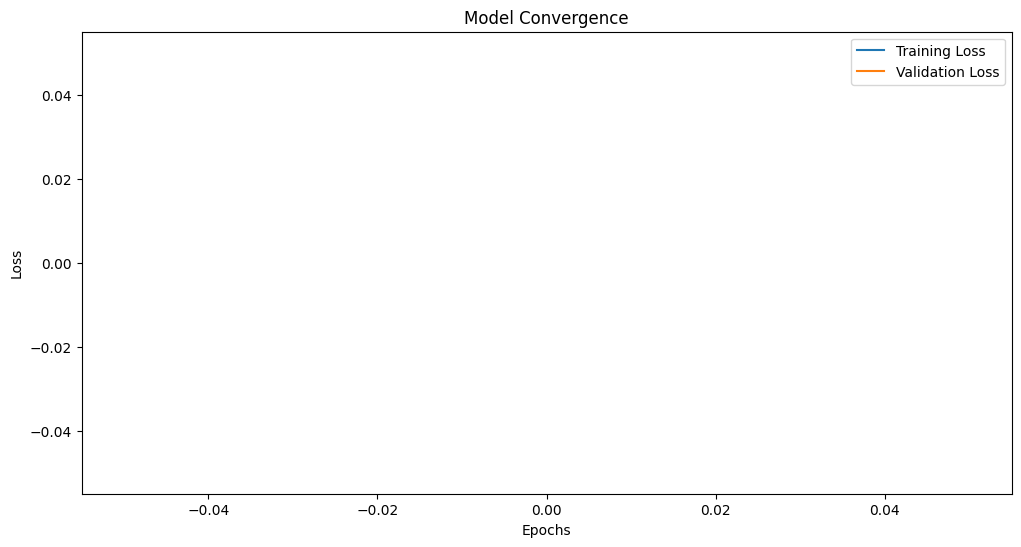

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Convergence")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# plot_history(history)